In [1]:
"""
16 sept 2021
grouazel
jai des fichiers qui nont peut pas tte les variables ou alors pas avec la meme dimension( hdf files cest de la merde)
"""

'\n16 sept 2021\ngrouazel\njai des fichiers qui nont peut pas tte les variables ou alors pas avec la meme dimension( hdf files cest de la merde)\n'

In [1]:
import glob
import time
import sys
import h5py
import os

In [63]:
dd = '/home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/exp1/training_dataset/v3_norm_v7/'
lst_files = glob.glob(os.path.join(dd,'*.h5'))
print('lst_files',len(lst_files))

lst_files 1698


In [64]:
print(lst_files[0])

/home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/exp1/training_dataset/v3_norm_v7/S1A_training_exp1_Hs_NN_regression_20180312.h5


In [65]:
needed_vars = ['cspcIm_ocn','cspcIm_slc','cspcRe_ocn','cspcRe_slc','cwave','cwave_ocn','dt','dx','dxdt','hsALT','hsSM',
              'incidence','incidenceAngle','latALT','latSAR','latlonSAR','latlonSARcossin','lonALT','lonSAR','nk',
              'normalizedVariance','py_S','py_S_ocn','satellite','sigma0','spectrum','spectrum_ocn','timeALT','timeSAR','todSAR']
#         double (phony_dim_0, phony_dim_2, phony_dim_1) ;
#         double (phony_dim_0, phony_dim_1, phony_dim_2) ;
#         double (phony_dim_0, phony_dim_2, phony_dim_1) ;
#         double (phony_dim_0, phony_dim_3) ;
#         double (phony_dim_0, phony_dim_3) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0, phony_dim_4) ;
#         float (phony_dim_0, phony_dim_5) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0, phony_dim_4) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0, phony_dim_4) ;
#         float (phony_dim_0, phony_dim_6) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0) ;
#         float (phony_dim_0) ;
#         double (phony_dim']
#                      double py_S(phony_dim_0, phony_dim_7) ;
#         double (phony_dim_0, phony_dim_7) ;
#         double (phony_dim_0, phony_dim_5) ;
#         float (phony_dim_0) ;
#         double (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_4) ;
#         double (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_4) ;
#         double (phony_dim_0, phony_dim_5) ;
#         double (phony_dim_0, phony_dim_5) ;
#         double (phony_dim_0, phony_dim_5) ;

# find corrupted and also check maximum values of spectrum from SLC
beware reading the min and max in variables cspcIm_slc and cspcRe_slc will never be between 0 and 1 since only spetrum variable is normalized
 to check that normalization is effective and suitable for training check spectrum variable

In [66]:
import numpy as np
files_corrupt = []
max_value_re = 0
max_value_im = 0
max_spectrum_slc_re = 0
max_spectrum_slc_im = 0
all_max_re = []
all_max_im = []
all_max_spectrum_slc_re = []
all_max_spectrum_slc_im = []
for ffi,ff in enumerate(lst_files):
    if ffi%40==0:
        print('%s/%s corrupted: %s max Re found : %s'%(ffi,len(lst_files),len(files_corrupt),max_spectrum_slc_re))
    try:
        data = h5py.File(ff,'r')
    except:
        print('%s corrupted'%ff)
        files_corrupt.append(ff)
        data= None
    #print('spectrum slc',data['spectrum'].shape)
    if data:
        if 'cspcIm_slc' in data:
            tmpmaim = np.nanmax(data['cspcIm_slc'][:])
            all_max_im.append(tmpmaim)
            if tmpmaim>max_value_im:
                max_value_im = tmpmaim
        if 'cspcRe_slc' in data:
            tmpmare = np.nanmax(data['cspcRe_slc'][:])
            all_max_re.append(tmpmare)
            if tmpmare>max_value_re:
                max_value_re = tmpmare
        if 'spectrum' in data:
            tmpmare = np.nanmax(data['spectrum'][:,:,:,0])
            tmpmaim = np.nanmax(data['spectrum'][:,:,:,1])
            all_max_spectrum_slc_re.append(tmpmare)
            all_max_spectrum_slc_im.append(tmpmaim)
            if tmpmare>max_spectrum_slc_re:
                max_spectrum_slc_re = tmpmare
            if tmpmaim>max_spectrum_slc_im:
                max_spectrum_slc_im = tmpmaim
        for vv in needed_vars:
            if vv not in data:
                print('alerte missing : %s in %s'%(vv,ff))
                if ff not in files_corrupt:
                    files_corrupt.append(ff)
            if data['nk'][:].shape[0] != data['cspcIm_ocn'][:].shape[0]:
                print('alerte length issue : nk != months in %s'%(ff))
                if ff not in files_corrupt:
                    files_corrupt.append(ff)
print('done')
print('max imaginary part raw',max_value_im)
print('max real part raw',max_value_re)
print('max imaginary part spectrum',max_spectrum_slc_im)
print('max real part spectrum',max_spectrum_slc_re)
print('final corrupted list',len(files_corrupt))

0/1698 corrupted: 0 max Re found : 0
40/1698 corrupted: 0 max Re found : 0.6044783082410606
80/1698 corrupted: 0 max Re found : 0.6044783082410606
120/1698 corrupted: 0 max Re found : 0.6044783082410606
160/1698 corrupted: 0 max Re found : 0.6044783082410606
200/1698 corrupted: 0 max Re found : 0.6044783082410606
240/1698 corrupted: 0 max Re found : 0.6044783082410606
280/1698 corrupted: 0 max Re found : 0.6044783082410606
320/1698 corrupted: 0 max Re found : 0.6044783082410606
360/1698 corrupted: 0 max Re found : 0.6044783082410606
400/1698 corrupted: 0 max Re found : 0.6044783082410606
440/1698 corrupted: 0 max Re found : 0.6044783082410606
480/1698 corrupted: 0 max Re found : 0.6044783082410606
520/1698 corrupted: 0 max Re found : 0.6582657017784934
560/1698 corrupted: 0 max Re found : 0.6582657017784934
600/1698 corrupted: 0 max Re found : 0.6582657017784934
640/1698 corrupted: 0 max Re found : 0.6582657017784934
680/1698 corrupted: 0 max Re found : 0.6582657017784934
720/1698 corr

In [ ]:
max imaginary part spectrum 152703468967.57712
max real part spectrum 283349121369042.2

In [48]:
all_max_re = np.array(all_max_re)

In [49]:
all_max_im = np.array(all_max_im)

In [50]:
tmpmaim

6.116145681850442e-22

In [51]:
max_value_im

152703468967.57712

In [35]:
print(all_max_im)

[8.71433791e+06 4.73538974e+07 3.32226870e+07 ... 8.41888225e+06
 3.09469823e+08 1.26055473e+07]


In [36]:
all_max_im = np.array(all_max_im)

In [37]:
all_max_re

array([2.19522080e+08, 6.30271331e+08, 6.50203023e+08, ...,
       6.30202656e+08, 1.63228185e+09, 2.30486716e+08])

In [ ]:
print(all_max_re.max())

In [38]:
all_max_im_log = np.log10(all_max_im)
all_max_re_log = np.log10(all_max_re)

# display distribution of maximums in log

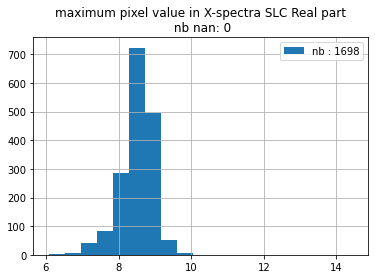

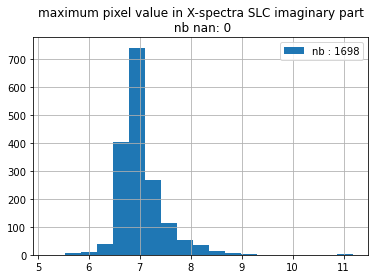

In [39]:
from matplotlib import pyplot as plt
#print(len(all_max_re),all_max_re)
#klsdjflsd
bins  = np.linspace(all_max_re_log.min(),all_max_re_log.max(),20)
plt.title('maximum pixel value in X-spectra SLC Real part\n nb nan: %s'%(np.isnan(np.array(all_max_re_log)).sum()))
plt.hist(np.array(all_max_re_log).ravel(),bins,label='nb : %s'%len(all_max_re_log))
plt.grid(True)
plt.legend()
plt.show()


bins  = np.linspace(all_max_im_log.min(),all_max_im_log.max(),20)
plt.title('maximum pixel value in X-spectra SLC imaginary part\n nb nan: %s'%(np.isnan(np.array(all_max_im_log)).sum()))
plt.hist(all_max_im_log.ravel(),bins,label='nb : %s'%len(all_max_im_log))
plt.grid(True)
plt.legend()
plt.show()

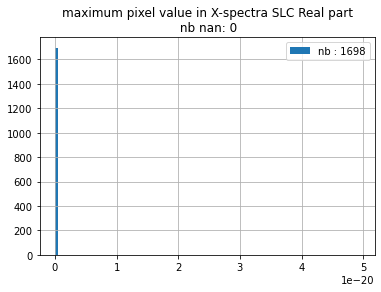

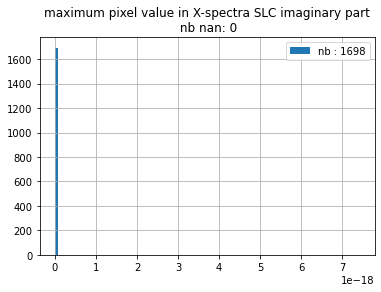

In [56]:
all_max_spectrum_slc_im = np.array(all_max_spectrum_slc_im)
all_max_spectrum_slc_re = np.array(all_max_spectrum_slc_re)
from matplotlib import pyplot as plt
#print(len(all_max_re),all_max_re)
#klsdjflsd
bins  = np.linspace(all_max_spectrum_slc_re.min(),all_max_spectrum_slc_re.max(),100)
plt.title('maximum pixel value in X-spectra SLC Real part\n nb nan: %s'%(np.isnan(np.array(all_max_spectrum_slc_re)).sum()))
plt.hist(np.array(all_max_spectrum_slc_re).ravel(),bins,label='nb : %s'%len(all_max_spectrum_slc_re))
plt.grid(True)
plt.legend()
plt.show()


bins  = np.linspace(all_max_spectrum_slc_im.min(),all_max_spectrum_slc_im.max(),100)
plt.title('maximum pixel value in X-spectra SLC imaginary part\n nb nan: %s'%(np.isnan(np.array(all_max_spectrum_slc_im)).sum()))
plt.hist(all_max_spectrum_slc_im.ravel(),bins,label='nb : %s'%len(all_max_spectrum_slc_im))
plt.grid(True)
plt.legend()
plt.show()

In [5]:
print(files_corrupt)

[]


# remove corrupted files

In [1]:
! rm -f /home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/exp1/training_dataset/v3_norm/S1A_training_exp1_Hs_NN_regression_20170706.h5 
! rm -f /home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/exp1/training_dataset/v3_norm/S1B_training_exp1_Hs_NN_regression_20180120.h5
! rm -f /home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/exp1/training_dataset/v3_norm/S1A_training_exp1_Hs_NN_regression_20171126.h5
! rm -f /home/datawork-cersat-public/cache/project/mpc-sentinel1/analysis/s1_data_analysis/hs_nn/exp1/training_dataset/v3_norm/S1A_training_exp1_Hs_NN_regression_20170223.h5
# note jai refais les fichiers supprimes a la main en terminal